# CMPT 2091 Final Project: Data Management and Analysis with Yelp API and Apache Spark

Name: Ashna Batra

### **Part One: Data Collection with Yelp API**


1.1 - Setup Yelp API
Before collecting data, you'll need to set up access to the Yelp API. Make sure you have your API key as outlined in the final project assignment document.

In [ ]:
# Set up the Yelp API Key
api_key = 'RyFCKKkVNgzxD0EfjxTmu2atjt6C0ucBCF9rrwT3cXT1KiaO69mWZwP3uSxeT5DqwQTqnB7ra5WtAoLSEYXrA5FrKlp889RfJ-SB5N_Xu4ZuC04-mh3vZxsz7BpaZ3Yx'  # Replace with your API key

# Yelp API endpoint for Business Search
endpoint_url = 'https://api.yelp.com/v3/businesses/search'

# Headers for authenticating the API request
headers = {
    'Authorization': f'Bearer {api_key}',
 }


1.2 - Making an API Request and Extracting Data
Use the Yelp API to fetch data based on your business idea. Adjust the parameters as necessary (location, categories, price range, etc.).

In [ ]:
import requests
import pandas as pd


# setting up locations and terms to expand the dataset
locations = ['San Francisco', 'Los Angeles', 'New York']
terms = ['restaurants', 'bars', 'cafes', 'bakeries', 'nightlife']
limit = 50  # Max results per request
offset = 0  # Start offset

# Creating an Empty List to Store Data
business_data = []

# Looping through locations and terms to fetch data
for term in terms:
    for location in locations:
        print(f"Fetching data for {term} in {location}...")
        # Define the search parameters (customize based on your business idea)
        params = {
            'term': term,
            'location': location,
            'limit': limit,
            'offset': offset
        }

        # Making the GET request to Yelp API
        response = requests.get(endpoint_url, headers=headers, params=params)
        # Handling the API Response
        if response.status_code == 200:
            data = response.json()
            businesses = data['businesses']
            if businesses:
                print(f"Found {len(businesses)} businesses for {term} in {location}")
                # Extracting Business Information
                for business in businesses:
                    name = business['name']
                    rating = business['rating']
                    price = business.get('price', 'N/A')  # Handle missing price
                    address = ', '.join(business['location']['display_address'])
                    categories = ', '.join([cat['title'] for cat in business['categories']])
                    review_count = business.get("review_count")
                    phone = business['phone']
                    # Storing Business Data in a List
                    business_data.append({
                        'Name': name,
                        'Rating': rating,
                        'Price': price,
                        'Address': address,
                        'Categories': categories,
                        'Review Count': review_count,
                        'Phone': phone
                    })


# Convert the list of business data into a DataFrame
df = pd.DataFrame(business_data)

# Display the DataFrame
print(f"Total businesses fetched: {len(df)}")
print(df.head())

Fetching data for restaurants in San Francisco...
Found 50 businesses for restaurants in San Francisco
Fetching data for restaurants in Los Angeles...
Found 50 businesses for restaurants in Los Angeles
Fetching data for restaurants in New York...
Found 50 businesses for restaurants in New York
Fetching data for bars in San Francisco...
Found 50 businesses for bars in San Francisco
Fetching data for bars in Los Angeles...
Found 50 businesses for bars in Los Angeles
Fetching data for bars in New York...
Found 50 businesses for bars in New York
Fetching data for cafes in San Francisco...
Found 50 businesses for cafes in San Francisco
Fetching data for cafes in Los Angeles...
Found 50 businesses for cafes in Los Angeles
Fetching data for cafes in New York...
Found 50 businesses for cafes in New York
Fetching data for bakeries in San Francisco...
Found 50 businesses for bakeries in San Francisco
Fetching data for bakeries in Los Angeles...
Found 50 businesses for bakeries in Los Angeles
Fet

1.3 - Save Data to CSV
Once the data is collected, save it to a CSV file for future use.

In [ ]:
# Save the extracted data into a CSV file
df.to_csv('yelp_data.csv', index=False)


**1.4 - Business Idea Explanation**

In this section, explain the business idea and why the data points (like business name, rating, price, etc.) are important for your application.

### Business Idea: Restaurant Locator App

Explain the purpose of your application and how the Yelp data you extracted will be used to support it. For example:

- **Business Idea**: A restaurant locator system.

PURPOSE OF THE BUSINESS:
The Restaurant Locator App is designed to make discovering dining options easy and efficient by providing users personalized, detailed, and filtered restaurant recommendations based on their preferences, such as cuisine, price, and ratings. the App helps users explore various restaurants at a location, like New York, San Francisco and Los Angeles.

- **Data Features Extracted**: Restaurant name, location, categories, ratings, price, review count and phone.

These features are important because:
- **Restaurant Name** : helps identify different places.
- **Location** : enables location-based recommendations, allowing users to find places nearby or within a specific area by provding exact address of the restaurant, whether in San Francisco, Los Angeles, or New York. .
- **Categories** : assist in grouping restaurants based on the type of cuisine or service they offer. Businesses based on their dining style and menu offerings. e.g. Cocktail Bars, Wine Bars, and Breakfast & Brunch. type of cuisine: Italian, Pasta Shops, Pizza
- **Ratings** : help to suggest highly-rated restaurants.

- **Price** : allows to filter dining options based on budget.

- **Review Count** : Shows the number of reviews a restaurant has received and how well-reviewed the place is.

- **Phone** : Contact information of the place.



# **Part Two: Data Management with Apache Spark**
**2.1- Setting Up PySpark**

Now that we have the Yelp data, we'll set up Apache Spark to handle large datasets.

In [ ]:
!pip install pyspark
!pip install findspark

In [ ]:
# Importing necessary libraries for PySpark
import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession

# Initialize the Spark session
spark = SparkSession.builder.appName('FinalProject').getOrCreate()

# Check if Spark session is initialized
spark


**2.2 - Loading Data into Spark DataFrame**

We'll load the data collected from Yelp into a Spark DataFrame.

In [ ]:
# Load the Yelp CSV data into a Spark DataFrame
yelp_data = spark.read.csv('yelp_data.csv', header=True, inferSchema=True)

# Display the schema and preview the data
yelp_data.printSchema()
yelp_data.show(5)


root
 |-- Name: string (nullable = true)
 |-- Rating: double (nullable = true)
 |-- Price: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Categories: string (nullable = true)
 |-- Review Count: integer (nullable = true)
 |-- Phone: long (nullable = true)

+--------------------+------+-----+--------------------+--------------------+------------+-----------+
|                Name|Rating|Price|             Address|          Categories|Review Count|      Phone|
+--------------------+------+-----+--------------------+--------------------+------------+-----------+
|             Bottega|   4.3|   $$|1132 Valencia St,...|Italian, Pasta Sh...|        1287|14156559048|
|Fog Harbor Fish H...|   4.4|   $$|Pier 39, San Fran...|Seafood, Wine Bar...|       11346|14154212442|
|      Marufuku Ramen|   4.5|   $$|1581 Webster St, ...|               Ramen|        5409|14158729786|
|     Kothai Republic|   4.6|  N/A|1398 9th Ave, San...|Asian Fusion, Tap...|         354|14157424058|
|

**2.3 - Basic Operations on Data Using Spark DataFrame**

Here, you can perform basic transformations and operations, such as filtering, grouping, and aggregating.

*   Example: Filtering businesses with a rating greater than 4
high_rated_businesses = yelp_data.filter(yelp_data['rating'] > 4)
high_rated_businesses.show(5)
*   Example: Grouping by category and counting the number of businesses
category_counts = yelp_data.groupBy('categories').count()
category_counts.show()
*   Example: Aggregating by category to calculate the average rating
average_rating = yelp_data.groupBy('categories').agg({'rating_count': 'avg'})
average_rating.show()

In [ ]:
#START YOUR CODE HERE
high_rated_restaurants = yelp_data.filter(yelp_data['rating'] > 4)
category_counts = yelp_data.groupBy('categories').count()
average_rating = yelp_data.groupBy('categories').agg({'rating': 'avg'})

#END YOUR CODE HERE
high_rated_restaurants.show(5)
category_counts.show()
average_rating.show()

+--------------------+------+-----+--------------------+--------------------+------------+-----------+
|                Name|Rating|Price|             Address|          Categories|Review Count|      Phone|
+--------------------+------+-----+--------------------+--------------------+------------+-----------+
|             Bottega|   4.3|   $$|1132 Valencia St,...|Italian, Pasta Sh...|        1287|14156559048|
|Fog Harbor Fish H...|   4.4|   $$|Pier 39, San Fran...|Seafood, Wine Bar...|       11346|14154212442|
|      Marufuku Ramen|   4.5|   $$|1581 Webster St, ...|               Ramen|        5409|14158729786|
|     Kothai Republic|   4.6|  N/A|1398 9th Ave, San...|Asian Fusion, Tap...|         354|14157424058|
|     The Hungry Spot|   4.9|   $$|2077 Hayes St, Sa...|Comfort Food, Sal...|          53|14156824111|
+--------------------+------+-----+--------------------+--------------------+------------+-----------+
only showing top 5 rows

+--------------------+-----+
|          categori

### Part Three: Data Analysis Using Spark SQL
**3.1 - Register DataFrame as Temp View**

We need to register the Spark DataFrame as a temporary SQL view to run SQL queries.

In [ ]:
# Register DataFrame as a temporary SQL view
yelp_data.createOrReplaceTempView("yelp_businesses")


**3.2 - Spark SQL Queries for Data Analysis**

Now, we can perform SQL queries to analyze the Yelp data. You need to perform an analysis of your data using Spark SQL and you should perform **a minimum of 10 SQL operations** to gain meaningful insights from the data you extraction from part one.

In [ ]:
print("Top 5 businesses by rating are: ")
# Example SQL Query: Get top 5 businesses by rating
top_rated_businesses = spark.sql("""
SELECT Name, Rating, Price, Address
FROM yelp_businesses
WHERE Rating > 4
ORDER BY Rating DESC
LIMIT 5
""")
top_rated_businesses.show()

print("Counting the number of businesses by price range: ")
# Example SQL Query: Count the number of businesses by price range
price_range_counts = spark.sql("""
SELECT Price, COUNT(*) as num_businesses
FROM yelp_businesses
GROUP BY Price
""")
price_range_counts.show()

print("Filtering the business with '$' price range: ")
# Example SQL Query: Filter businesses with the '$' price range - indicating affordable businesses.
yelp_data_with_price_class = spark.sql("""
    SELECT *
    FROM yelp_businesses
    WHERE Price IN ('$')
""")
yelp_data_with_price_class.show(5)


print("Displaying the most popular categories: ")
# Most Popular Categories
most_popular_categories = spark.sql("""
    SELECT Categories, COUNT(*) AS category_count
    FROM yelp_businesses
    GROUP BY Categories
    ORDER BY category_count DESC
""")
most_popular_categories.show()


print("Top 10 Restaurants by Review Count: ")
# Top 10 Restaurants by Review Count
top_10_restaurants_by_review = spark.sql("""
   SELECT Name, `Review Count`
   FROM yelp_businesses
   WHERE `Review Count` IS NOT NULL
   ORDER BY `Review Count` DESC
   LIMIT 10
""")
top_10_restaurants_by_review.show()


print("Average Rating by Location: ")
# Average Rating by Location
average_rating_by_location = spark.sql("""
    SELECT Address, AVG(rating) AS avg_rating
    FROM yelp_businesses
    GROUP BY Address
    ORDER BY avg_rating DESC
""")
average_rating_by_location.show()


print("Most Expensive Restaurant in San Francisco by Each Category: ")
most_expensive_restaurant = spark.sql('''
SELECT Categories, Name, Price, Address
FROM (
    SELECT Categories, Name, Price, Address,
           RANK() OVER (PARTITION BY Categories ORDER BY Price DESC) AS rank
    FROM yelp_businesses
    WHERE Address LIKE '%San Francisco%' AND Price IS NOT NULL
) ranked
WHERE rank = 1
''')
most_expensive_restaurant.show()


print("Restaurants with 5 Star Ratings: ")
# Restaurants with 5 Star Ratings
restaurants_with_5_stars = spark.sql('''
    SELECT Name, Rating
    FROM yelp_businesses
    WHERE Rating = 5
''')
restaurants_with_5_stars.show()


print(" top 10 businesses with the highest rating: ")
# Show the top 10 businesses with the highest rating
top_10_businesses = spark.sql('''
    SELECT Name, Rating
    FROM yelp_businesses
    ORDER BY Rating DESC
    LIMIT 10
''')
top_10_businesses.show()


print("Top 10 Businesses with the Lowest Rating in New York: ")
# Get the businesses with the lowest rating
lowest_rated_businesses = spark.sql('''
    SELECT Name, Rating
    FROM yelp_businesses
    WHERE Address LIKE '%New York%'
    ORDER BY Rating ASC
    LIMIT 10
''')
lowest_rated_businesses.show()


print("Business with no reviews: ")
businesses_with_no_reviews = spark.sql("""
SELECT Name, Address
FROM yelp_businesses
WHERE `Review Count` = 0
""")
businesses_with_no_reviews.show()


print("Average Rating and Review Count for Businesses in Los Angeles: ")
los_angeles_avg_rating = spark.sql("""
SELECT Name, AVG(Rating) AS Avg_Rating, SUM(`Review Count`) AS Total_Reviews
FROM yelp_businesses
WHERE Address LIKE '%Los Angeles%'
GROUP BY Name
ORDER BY Avg_Rating DESC
LIMIT 10
""")
los_angeles_avg_rating.show()


print("Top Categories with the Fewest Businesses in Los Angeles")
fewest_businesses_in_category = spark.sql("""
SELECT Categories, COUNT(*) AS Business_Count
FROM yelp_businesses
WHERE Address LIKE '%Los Angeles%'
GROUP BY Categories
ORDER BY Business_Count ASC
""")
fewest_businesses_in_category.show()


Top 5 businesses by rating are: 
+--------------------+------+-----+--------------------+
|                Name|Rating|Price|             Address|
+--------------------+------+-----+--------------------+
|   Tribute Hollywood|   5.0|  N/A|1608 N Cahuenga B...|
|   The Melrose House|   5.0|  N/A|4216 Melrose Ave,...|
|                Gair|   5.0|  N/A|41 Washington St,...|
|            D.Lounge|   5.0|  N/A|4001 W 6th St, Lo...|
|SHOWA Le Gourmet ...|   5.0|  N/A|1550 Howard St, S...|
+--------------------+------+-----+--------------------+

Counting the number of businesses by price range: 
+-----+--------------+
|Price|num_businesses|
+-----+--------------+
|   $$|           404|
|  $$$|            62|
| $$$$|             9|
|  N/A|           190|
|    $|            85|
+-----+--------------+

Filtering the business with '$' price range: 
+-------------+------+-----+--------------------+--------------------+------------+-----------+
|         Name|Rating|Price|             Address|   

**3.3 - Data Visualization**

You can visualize the results of your Spark SQL analysis using libraries like Matplotlib or Seaborn.

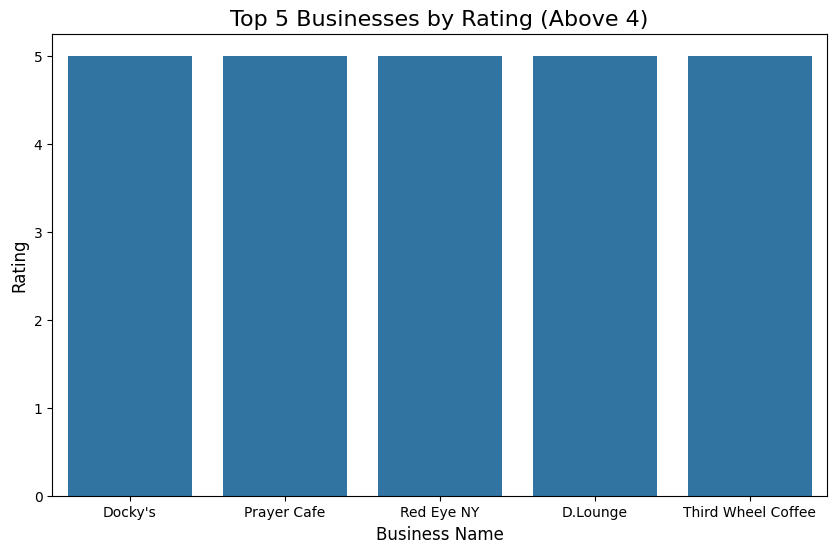

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Execute the SQL query to get top 5 rated businesses
top_rated_businesses = spark.sql("""
SELECT Name, Rating, Price, Address
FROM yelp_businesses
WHERE Rating > 4
ORDER BY Rating DESC
LIMIT 5
""")

# Convert Spark DataFrame to Pandas DataFrame for visualization
top_rated_businesses_pandas = top_rated_businesses.toPandas()

# Plotting the number of businesses per category
plt.figure(figsize=(10,6))
sns.barplot(x='Name', y='Rating', data=top_rated_businesses_pandas)
plt.title('Top 5 Businesses by Rating (Above 4)', fontsize=16)
plt.xlabel('Business Name', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.show()


Conclusion & Next Steps

### Conclusion
Summarize the key findings from your analysis, explaining how they support your business idea. For example:

- **Top Rated Businesses**: We identified the highest-rated businesses, which are ideal candidates for recommendation.
- **Category Insights**: Our analysis showed which categories are most popular in the Yelp dataset.

### Future Steps
- **Expand Data Collection**: Collect more data points (e.g., reviews, more businesses).
- **Improve Recommendations**: Use the data to create a recommendation algorithm.


**Some more visulations:**

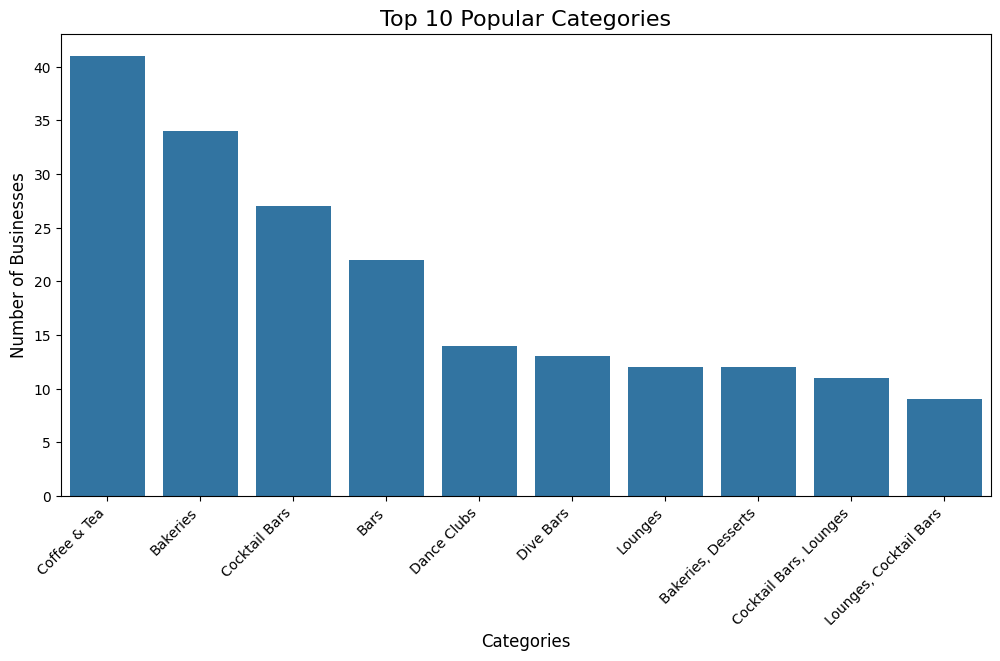

In [ ]:
# Query for Popular Categories
popular_categories = spark.sql("""
SELECT Categories, COUNT(*) AS Count
FROM yelp_businesses
GROUP BY Categories
ORDER BY Count DESC
LIMIT 10
""")

# Convert to Pandas DataFrame for visualization
popular_categories_pandas = popular_categories.toPandas()

# Plot Popular Categories
plt.figure(figsize=(12, 6))
sns.barplot(data=popular_categories_pandas, x='Categories', y='Count')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Popular Categories', fontsize=16)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Number of Businesses', fontsize=12)
plt.show()


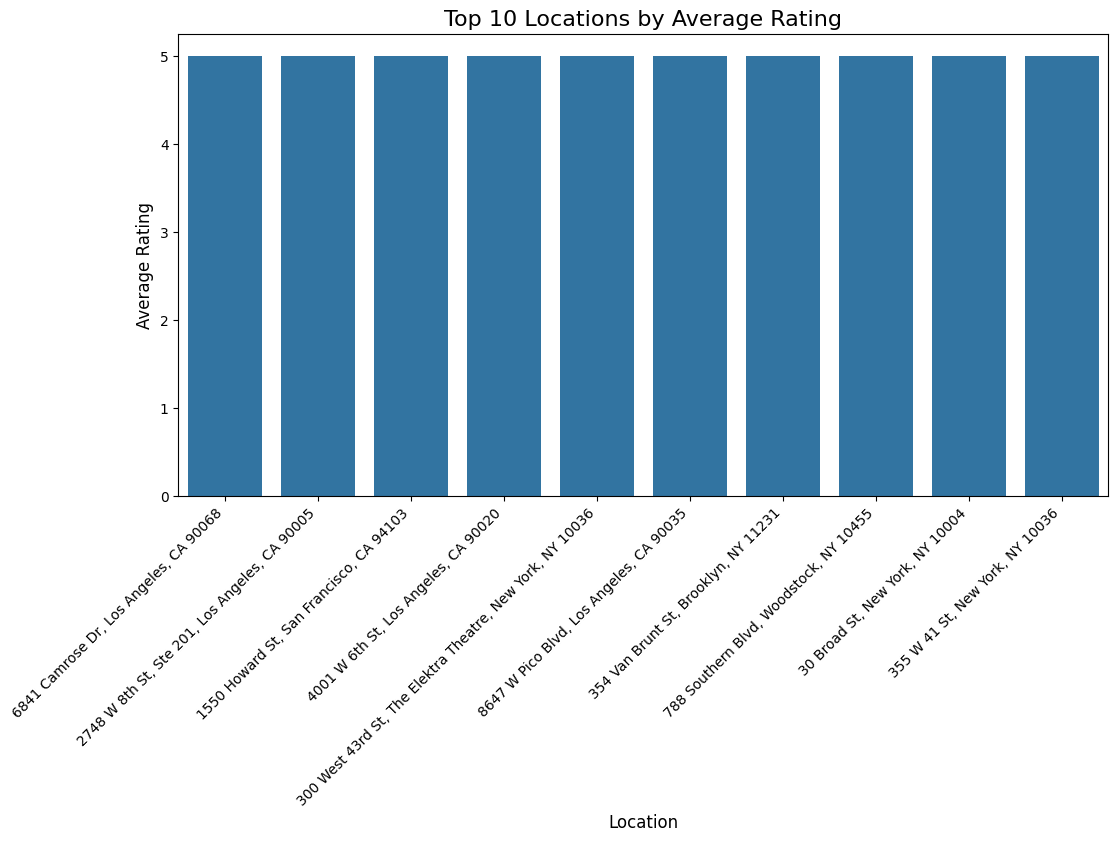

In [ ]:
# Query for Average Ratings by Location
location_ratings = spark.sql("""
SELECT Address, AVG(Rating) AS Avg_Rating
FROM yelp_businesses
GROUP BY Address
ORDER BY Avg_Rating DESC
LIMIT 10
""")

# Convert to Pandas DataFrame for visualization
location_ratings_pandas = location_ratings.toPandas()

# Plot Ratings by Location
plt.figure(figsize=(12, 6))
sns.barplot(data=location_ratings_pandas, x='Address', y='Avg_Rating')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Locations by Average Rating', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.show()
